In [46]:
# importing analytical tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Data Preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Global setting
sns.set_style(style='darkgrid')
warnings.filterwarnings(action="ignore")

In [2]:
# Reading the data
data = pd.read_csv("../data/raw/heart_2022_Key_indicators.csv")
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
# Getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# checking for duplicates in the dataset
data.duplicated().sum()

18078

In [5]:
# checking the locations of the duplicated data point
data.loc[data.duplicated(subset=['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'])]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [6]:
# dropping the duplicated columns
data = data.drop_duplicates()

In [7]:
#checking for missing values
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
# Making sanity check of the data after dropping duplicates
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

# Exploratory Data Analysis

In [9]:
# Getting the descriptive statistics of the quantitative variables
data.describe(exclude='object')

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [10]:
# Getting the descriptive statistics of the qualitative variables
data.describe(exclude=['int64', 'float64'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,274456,174312,280136,289653,257362,159671,31670,227724,251796,230412,104796,259066,289941,272425


## Univariate Data Analysis

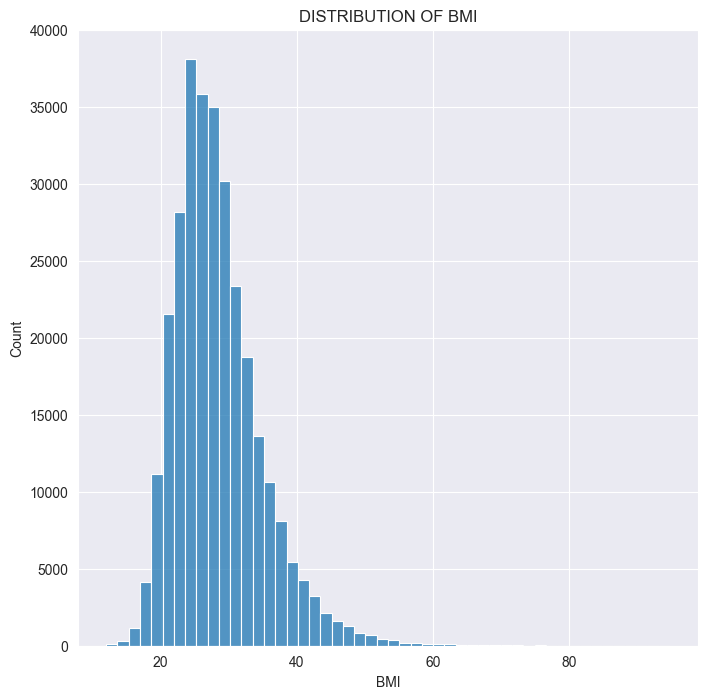

In [11]:
# Looking at the distribution of BMI
plt.figure(figsize=(8,8))
sns.histplot(data['BMI'], bins=50).set(title="DISTRIBUTION OF BMI");

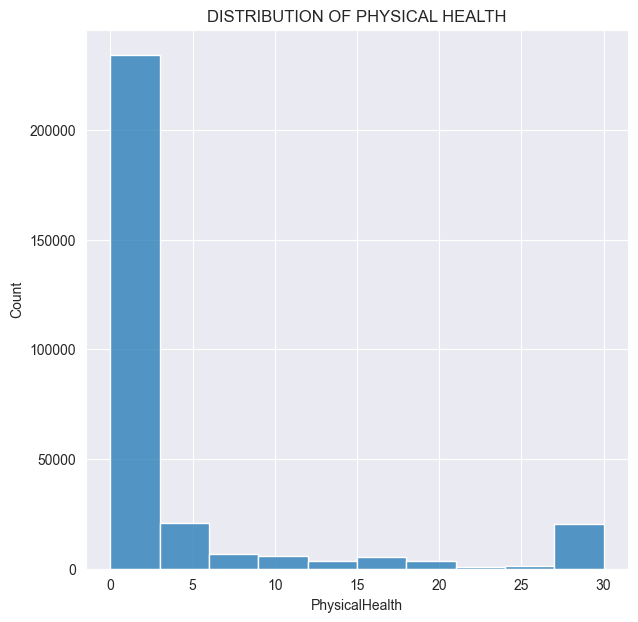

In [12]:
# Dristribution for Physical Health
plt.figure(figsize=(7,7))
sns.histplot(data['PhysicalHealth'], bins=10).set(title='DISTRIBUTION OF PHYSICAL HEALTH');

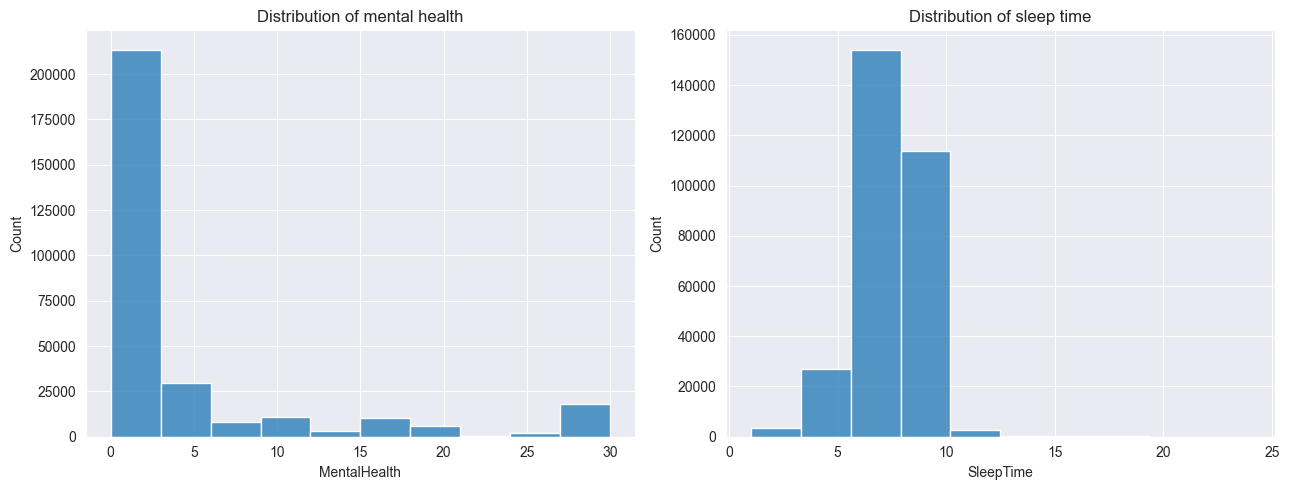

In [13]:
# Distribution of mental health and sleep time
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
axes = axes.flatten()
axes[0] = sns.histplot(data['MentalHealth'], bins=10, ax=axes[0]).set(title="Distribution of mental health")
axes[1] = sns.histplot(data['SleepTime'], bins=10, ax=axes[1]).set(title="Distribution of sleep time")
plt.tight_layout()

### Insights from Distributions
1. The distribution of BMI is skewed to the right. Most of the observations have BMI values from 20 to 38 with a few observations having higher BMI values from 40 to 60 and very few observations having very high BMI values
2. The distribution of Physical health and mental health is skewed to the right indicating that most of the observations have physical health issues from 0 to 4 days. Qiuet a number of observations have high physical and mental health issues spanning from 5 to 20 days. It is also noticed that some observations have have as high as 30 days since they had physical and mental health issues. We will explore deeply to check whether a person's physical and mental health has an effect on their chances of having a heart disease or not
3. From the distribution of Sleep time, it was observed that most participants have sleep time between 6 to 10 hours while some have 5 hours sleep time. Very few observations have very few and extremely high sleep time(i.e. 0-2hours and 10-13 hours)

Text(0, 0.5, 'Count')

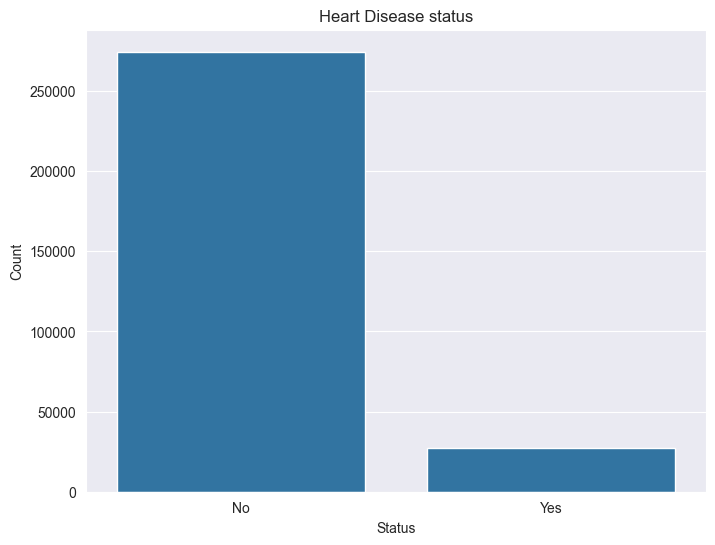

In [16]:
# Let's first look at the target variable, Whether people are having heart diseases or not
plt.figure(figsize=(8,6))
sns.countplot(x=cat_cols['HeartDisease']).set(title="Heart Disease status")
plt.xlabel('Status')
plt.ylabel('Count')

In [23]:
cat_cols = data.select_dtypes(exclude= ['int64', 'float64'])
cat_cols.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [17]:
# Visualizing Categorical variables
# create a fucntion to plot two categorical variables
def plot_cat(var_1:str, var_2:str):
    # Graph for first variable
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
    cat_cols[var_1].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', explode=[0, 0.01])
    axes[0].set_title(f"Distribution of {var_1}")

    # Drawing chart for the second variable
    cat_cols[var_2].value_counts().plot.bar(ax=axes[1])
    axes[1].set_title(f"Distribution of {var_2}")
    axes[1].set_xlabel("Category")
    axes[1].set_ylabel("Counts")

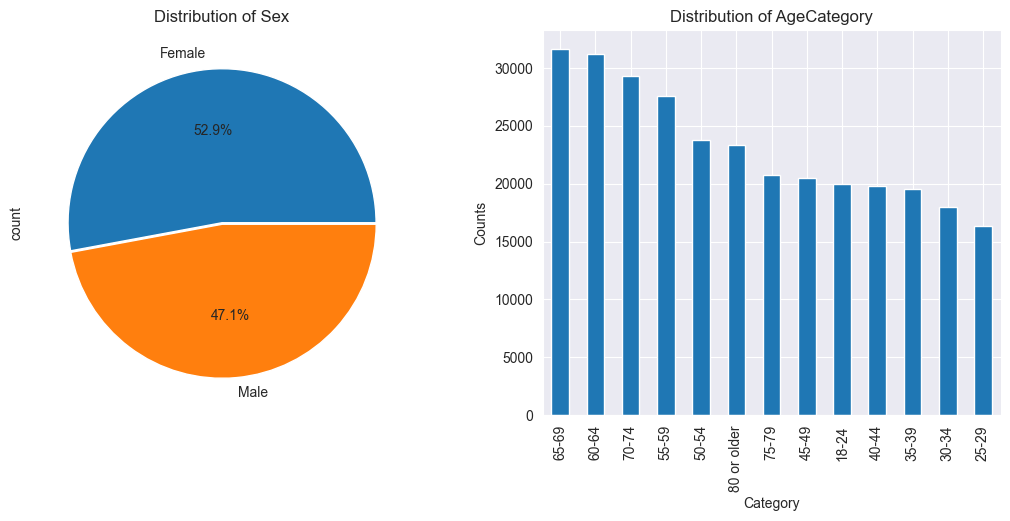

In [18]:
# calling the function to plot Gender and age category
plot_cat('Sex', 'AgeCategory')

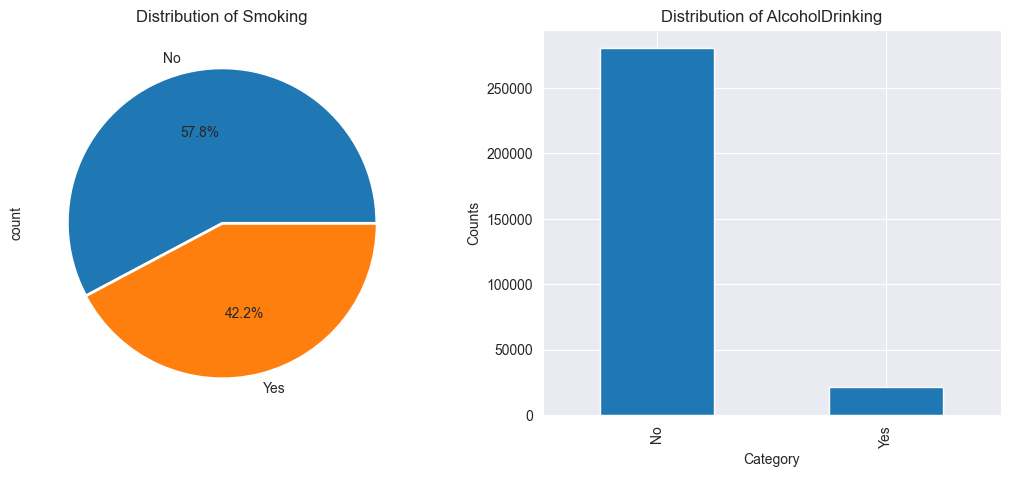

In [19]:
# plotting Smoke status and Alcohol drinking status
plot_cat('Smoking', 'AlcoholDrinking')

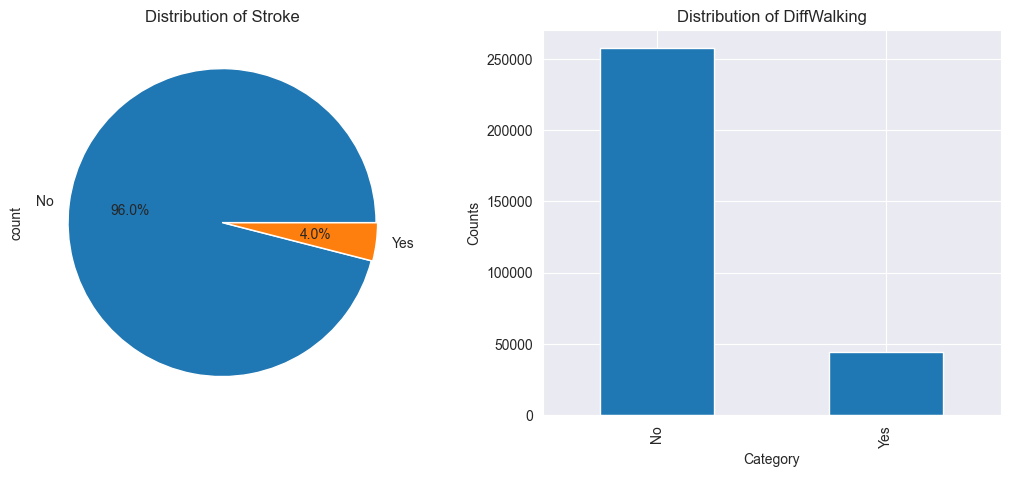

In [20]:
# Ploting for Stroke status and diifficulty in walking
plot_cat('Stroke', 'DiffWalking')

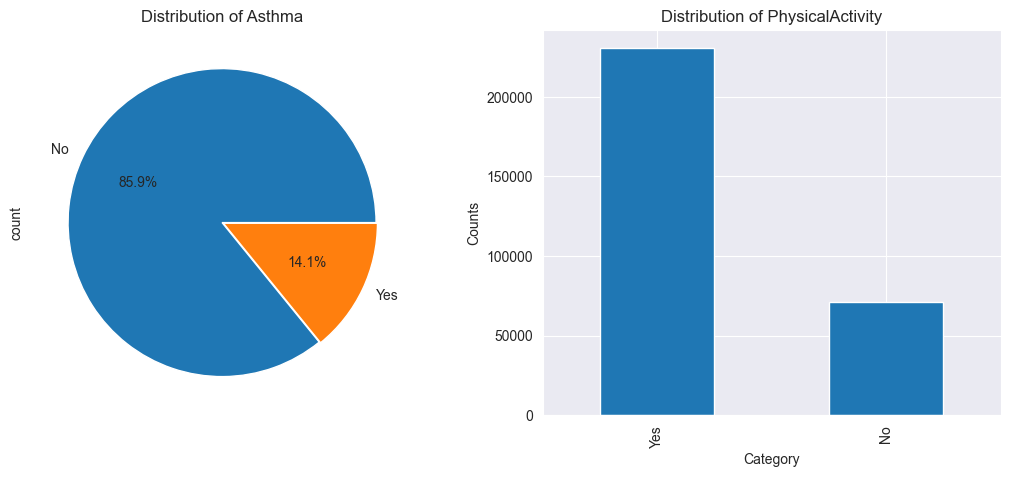

In [21]:
# Drowing charts for Asthma and Physical Activities
plot_cat('Asthma', 'PhysicalActivity')

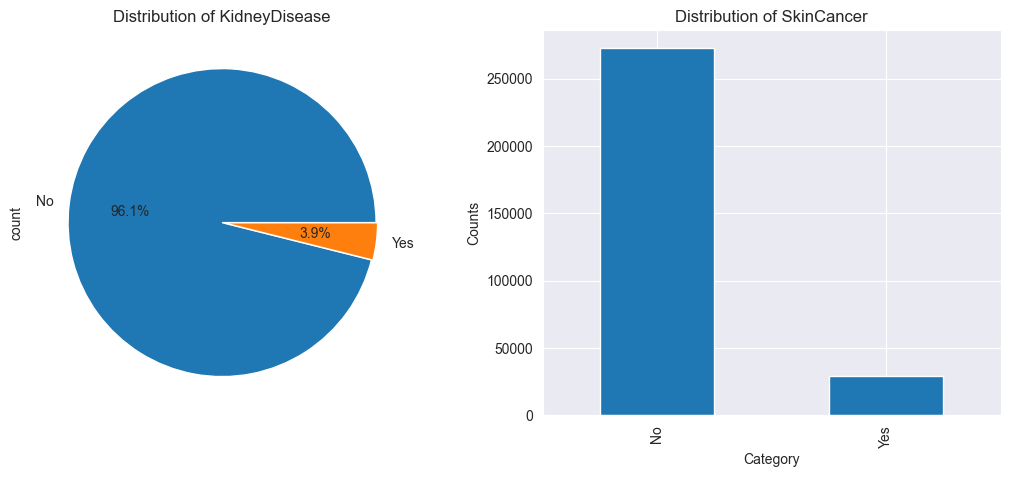

In [22]:
# Drowing charts for Kidney Disease status and Skin cancer status
plot_cat('KidneyDisease', 'SkinCancer')

## Multivariate Analysis

<Axes: title={'center': 'Stroke status and heart disease status'}, xlabel='Stroke', ylabel='count'>

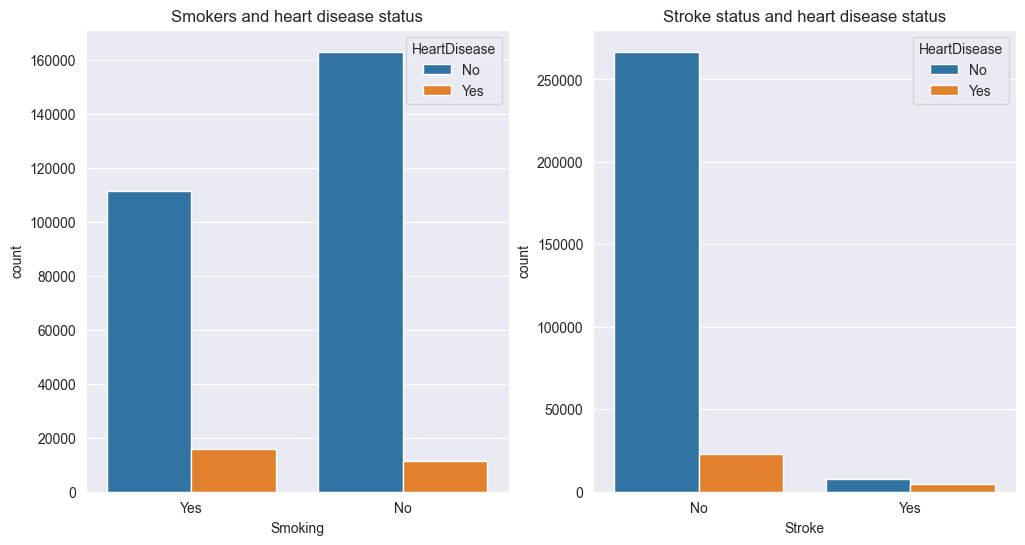

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Smokers and heart disease status")
sns.countplot(data=cat_cols, x='Smoking', hue='HeartDisease')

plt.subplot(1,2,2)
plt.title("Stroke status and heart disease status")
sns.countplot(data=cat_cols, x='Stroke', hue='HeartDisease')

<Axes: title={'center': 'Diabetic status and heart disease status'}, xlabel='Diabetic', ylabel='count'>

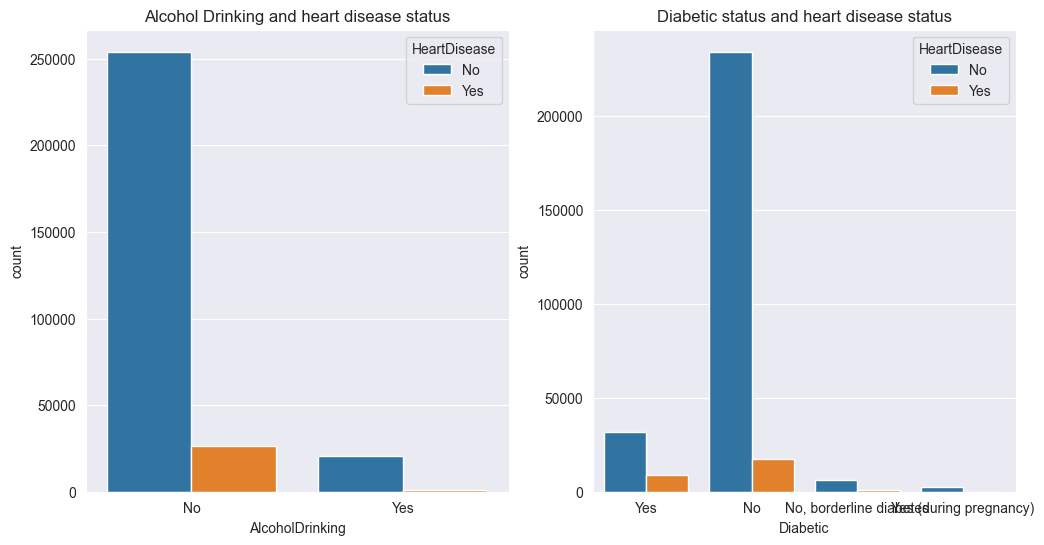

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Alcohol Drinking and heart disease status")
sns.countplot(data=cat_cols, x='AlcoholDrinking', hue='HeartDisease')

plt.subplot(1,2,2)
plt.title("Diabetic status and heart disease status")
sns.countplot(data=cat_cols, x='Diabetic', hue='HeartDisease')

<Axes: title={'center': 'Asthma status and heart disease status'}, xlabel='Asthma', ylabel='count'>

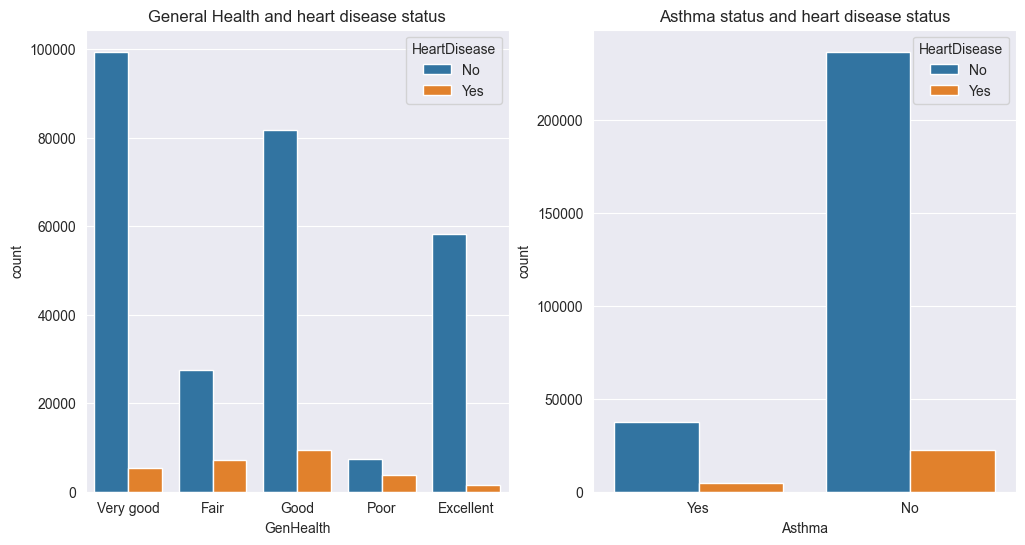

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("General Health and heart disease status")
sns.countplot(data=cat_cols, x='GenHealth', hue='HeartDisease')

plt.subplot(1,2,2)
plt.title("Asthma status and heart disease status")
sns.countplot(data=cat_cols, x='Asthma', hue='HeartDisease')

# Data Preprocessing

In [37]:
# Get various columns and make it ready for the preprocessing
bin_cat_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
mult_cat_cols = ['AgeCategory','Race','Diabetic','GenHealth']
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [47]:
# Transform the data
ct = make_column_transformer(
    (OrdinalEncoder(), bin_cat_cols),
    (MinMaxScaler(), num_cols),
    (OneHotEncoder(), mult_cat_cols)
)

In [43]:
# split the data into training and testing set
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train_transf = ct.fit_transform(X_train)
X_test_transf = ct.transform(X_test)

In [50]:
pd.DataFrame(X_train_transf[:5])

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.059761,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327659,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.180490,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.149583,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.122299,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [54]:
# preprocess the target
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [55]:
# convert back to Dataframe and put them in the preprocessed data
training_set = pd.DataFrame(X_train_transf)
testing_set = pd.DataFrame(X_test_transf)

training_set['Target'] = y_train
testing_set['Target'] = y_test

In [57]:
# convert to csv files
training_set.to_csv('../data/preprocessed/training_set.csv')